In [37]:
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import cv2
import matplotlib.pyplot as plt

REBUILD_DATA = True

In [38]:
class HindiAlphabets():
    IMG_SIZE = 50
    KA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_1_ka"
    KHA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_2_kha"
    GA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_3_ga"
    GHA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_4_gha"
    KNA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_5_kna"
    CHA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_6_cha"
    CHHA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_7_chha"
    JA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_8_ja"
    JHA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_9_jha"
    YNA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_10_yna"
    TAA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_11_taamatar"
    THAA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_12_thaa"
    DAA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_13_daa"
    DHAA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_14_dhaa"
    ADNA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_15_adna"
    TA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_16_tabala"
    THA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_17_tha"
    DA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_18_da"
    DHA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_19_dha"
    NA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_20_na"
    PA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_21_pa"
    PHA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_22_pha"
    BA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_23_ba"
    BHA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_24_bha"
    MA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_25_ma"
    YAW = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_26_yaw"
    RA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_27_ra"
    LA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_28_la"
    WAW = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_29_waw"
    SAW = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_30_motosaw"
    SHA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_31_petchiryakha"
    SAW = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_32_patalosaw"
    HA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_33_ha"
    CHHYA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_34_chhya"
    TRA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_35_tra"
    GYA = "C:/Users/Divesh/pytorch proj/Hindi-Alphabet-Recognition/DevanagariHandwrittenCharacterDataset/Train/character_36_gya"
    
    IMG_SIZE = 50
    
    LABELS = {KA:1,KHA:2,GA:3,GHA:4,KNA:5,CHA:6,CHHA:7,JA:8,JHA:9,YNA:10,TAA:11,THAA:12,DAA:13,DHAA:14,ADNA:15,TA:16,THA:17,DA:18,DHA:19,NA:20,PA:21,PHA:22,BA:23,BHA:24,MA:25,YAW:26,RA:27,LA:28,WAW:29,SAW:30,SHA:31,SAW:32,HA:33,CHHYA:34,TRA:35,GYA:36}
    
    training_data = []
    
    def make_training_data(self):
        for label in self.LABELS:
            for f in tqdm( os.listdir(label)) :
                try:
                    path = os.path.join(label,f)
                    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))

                    self.training_data.append([np.array(img),np.eye(36)[self.LABELS[label]]])
                except Exception as e:
                    pass
        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)


    
if REBUILD_DATA:
    alphabet = HindiAlphabets()
    alphabet.make_training_data()


100%|██████████| 2000/2000 [00:05<00:00, 369.60it/s]

100%|██████████| 2000/2000 [00:05<00:00, 380.90it/s]

100%|██████████| 2000/2000 [00:04<00:00, 429.69it/s]

 38%|███▊      | 763/2000 [00:01<00:02, 451.75it/s]


100%|██████████| 2000/2000 [00:04<00:00, 427.49it/s]

100%|██████████| 2000/2000 [00:14<00:00, 135.44it/s]

100%|██████████| 2000/2000 [00:06<00:00, 293.55it/s]

 10%|▉         | 198/2000 [00:00<00:07, 235.65it/s]


100%|██████████| 2000/2000 [00:05<00:00, 344.35it/s]

100%|██████████| 2000/2000 [00:04<00:00, 439.27it/s]

100%|██████████| 2000/2000 [00:08<00:00, 222.70it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


100%|██████████| 2000/2000 [00:05<00:00, 373.12it/s]

100%|██████████| 2000/2000 [00:04<00:00, 476.80it/s]

100%|██████████| 2000/2000 [00:03<00:00, 500.72it/s]

 63%|██████▎   | 1269/2000 [00:03<00:02, 315.21it/s]


100%|██████████| 2000/2000 [00:05<00:00, 361.02it/s]

100%|██████████| 2000/2000 [00:05<00:00, 375.22it/s]

100%|██████████| 2000/2000 [00:06<00:00, 290.06it/s]

 90%|█████████ | 1808/2000 [00:04<00:00, 362.82it/s]


100%|██████████| 2000/2000 [00:04<00:00, 444.26it/s]

100%|██████████| 2000/2000 [00:04<00:00, 418.77it/s]

100%|██████████| 2000/2000 [00:07<00:00, 279.75it/s]

 77%|███████▋  | 1548/2000 [00:06<00:00, 503.00it/s]


100%|██████████| 2000/2000 [00:08<00:00, 239.55it/s]

100%|██████████| 2000/2000 [01:30<00:00, 22.17it/s] 

100%|██████████| 2000/2000 [00:05<00:00, 397.51it/s]

 93%|█████████▎| 1855/2000 [00:06<00:00, 351.56it/s]


100%|██████████| 2000/2000 [00:07<00:00, 278.21it/s]

100%|██████████| 2000/2000 [00:09<00:00, 218.46it/s]

100%|██████████| 2000/2000 [00:08<00:00, 223.70it/s]

 44%|████▍     | 878/2000 [00:02<00:02, 439.84it/s]


100%|██████████| 2000/2000 [00:05<00:00, 360.26it/s]

100%|██████████| 2000/2000 [00:04<00:00, 454.76it/s]

100%|██████████| 2000/2000 [00:04<00:00, 417.55it/s]

 87%|████████▋ | 1738/2000 [00:04<00:00, 419.74it/s]


100%|██████████| 2000/2000 [00:04<00:00, 401.35it/s]

100%|██████████| 2000/2000 [00:06<00:00, 305.04it/s]

100%|██████████| 2000/2000 [00:05<00:00, 366.41it/s]

100%|██████████| 2000/2000 [00:04<00:00, 424.83it/s]

 10%|█         | 201/2000 [00:00<00:06, 272.91it/s]


100%|██████████| 2000/2000 [00:05<00:00, 353.17it/s]

100%|██████████| 2000/2000 [00:06<00:00, 332.87it/s]

100%|██████████| 2000/2000 [00:04<00:00, 451.24it/s]

 37%|███▋      | 746/2000 [00:01<00:03, 369.21it/s]


100%|██████████| 2000/2000 [00:04<00:00, 437.47it/s]


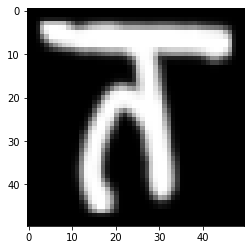

In [39]:
training_data = np.load("training_data.npy",allow_pickle=True)


plt.imshow(training_data[2][0],cmap = "gray")
plt.show()

In [50]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,32,5)
        self.conv2 = nn.Conv2d(32,64,5)
        self.conv3 = nn.Conv2d(64,128,5)
        
        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)
        
        self.fc1 = nn.Linear(self._to_linear,512)
        self.fc2 = nn.Linear(512,36)
    
    
    def convs(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)),(2,2))
        
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x
    
    def forward(self,x):
        x = self.convs(x)
        x = x.view(-1,self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x,dim=1)
net = Net()

In [51]:
import torch.optim as optim

optimizer  = optim.Adam(net.parameters(),lr = 0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X  =X/255.0

y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)
print(val_size)


6800


In [52]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X))
print(len(test_X))

61200
6800


In [53]:
BATCH_SIZE = 100
EPOCHS = 2

for epoch in range(EPOCHS):
    for i in tqdm(range(0,len(train_X),BATCH_SIZE)):
        batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
        batch_y = train_y[i:i+BATCH_SIZE]
        
        net.zero_grad()
        outputs = net(batch_X)
        
        loss = loss_function(outputs,batch_y)
        loss.backward()
        optimizer.step()
print(loss)



 27%|██▋       | 165/612 [03:21<08:16,  1.11s/it]


 54%|█████▎    | 328/612 [06:30<05:23,  1.14s/it]


 80%|████████  | 491/612 [09:37<02:16,  1.13s/it]


100%|██████████| 612/612 [11:48<00:00,  1.16s/it]

  7%|▋         | 43/612 [00:47<10:35,  1.12s/it]


 34%|███▍      | 207/612 [03:52<07:15,  1.08s/it]


 60%|██████    | 370/612 [06:57<04:35,  1.14s/it]


 87%|████████▋ | 533/612 [09:47<01:16,  1.03it/s]


100%|██████████| 612/612 [11:08<00:00,  1.09s/it]


tensor(0.0015, grad_fn=<MseLossBackward>)


In [54]:
correct = 0
total = 0

with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1,1,50,50))[0]
        predicted_class = torch.argmax(net_out)
        if predicted_class == real_class:
            correct+=1
        total+=1
print(" Accuracy = ",round(correct/total,3))


 29%|██▉       | 1983/6800 [00:17<00:46, 104.03it/s]


 57%|█████▋    | 3889/6800 [00:35<00:29, 100.37it/s]


 86%|████████▌ | 5857/6800 [00:52<00:07, 123.79it/s]


100%|██████████| 6800/6800 [01:01<00:00, 110.47it/s]


 Accuracy =  0.951
